In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from skimage.feature import hog



In [15]:
img_array = np.load('img_array.npy')
label_array = np.load('label_array.npy')

# Feature extraction (Radon Transform)

In [16]:
feature_array = []


for img in img_array:

    #Sobel (Edge)
    filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
    outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
    img = np.sqrt((outX**2)+(outY**2))


    tta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = skt.radon(img, theta=tta)


    feature_array.append(np.array(sinogram).reshape(-1,1))


feature_array = np.array(feature_array).reshape(554,-1)


# Split Train and Test

In [17]:
from sklearn.model_selection import train_test_split

#train, train_label
#test, test_label

train, test, train_label, test_label = train_test_split(feature_array, label_array, test_size=0.2, random_state=7)

# Train

## KNN Model

In [18]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_knn.fit(train, train_label)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## SVM Model

In [19]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',)
clf_svm.fit(train, train_label)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

## Naive Bayes Model

In [20]:
clf_nab = GaussianNB()
clf_nab.fit(train, train_label)

GaussianNB()

# Test

In [21]:
pred_knn = clf_knn.predict(test)
pred_svm = clf_svm.predict(test)
pred_nab = clf_nab.predict(test)

## Accuracy

In [22]:
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(test_label, pred_knn),2)
score_svm = round(accuracy_score(test_label, pred_svm),2)
score_nab = round(accuracy_score(test_label, pred_nab),2)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)
print("Naive Bayes Model Accuracy:", score_nab)

KNN Model Accuracy: 0.25
SVM Model Accuracy: 0.41
Naive Bayes Model Accuracy: 0.3


In [24]:
from sklearn.metrics import classification_report

report_svm = classification_report(test_label, pred_svm, target_names=clf_svm.classes_)
print(report_svm)

              precision    recall  f1-score   support

      Bishop       0.67      0.60      0.63        20
        King       0.25      0.27      0.26        15
      Knight       0.50      0.45      0.47        20
        Pawn       0.35      0.30      0.33        23
       Queen       0.22      0.27      0.24        15
        Rook       0.43      0.50      0.46        18

    accuracy                           0.41       111
   macro avg       0.40      0.40      0.40       111
weighted avg       0.42      0.41      0.41       111



## Confusion Matrix plot


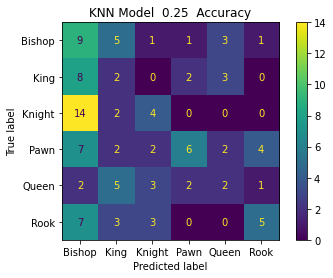

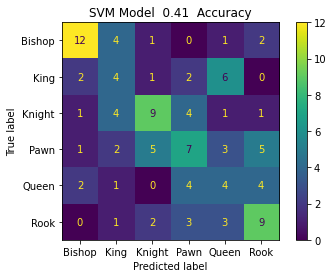

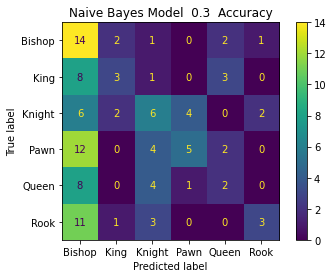

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(test_label, pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(test_label, pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)

cm_nab = confusion_matrix(test_label, pred_nab)
disp_nab = ConfusionMatrixDisplay(confusion_matrix=cm_nab, display_labels=clf_nab.classes_)

disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

disp_nab.plot()
disp_nab.ax_.set_title('Naive Bayes Model  '+str(score_nab)+'  Accuracy')

plt.show()